In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [18]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [19]:
# load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/Datasets/Estimated Stock of Science and Technology Personnel.csv',index_col=0)

In [20]:
df

,1991,1996,1998,1999,2000,2001
Category,,,,,,
Engineering Degree Holders,519.6,753.3,859.1,913.7,969.5,1024.4
Engineering Diploma Holders,859.3,1173.1,1312.3,1379.5,1546.0,1531.7
Medical Graduates*,310.3,358.4,380.4,391.7,403.4,415.9
Agricultural Graduates,168.4,202.3,216.5,223.8,231.2,238.6
Veterinary Graduates,34.4,40.2,42.7,44.0,45.3,46.7
Science Graduates,2430.3,3154.8,3479.3,3655.4,3837.7,4024.9
Science Post Graduates,482.0,626.1,695.5,730.6,767.1,805.0
Total,4804.3,6308.2,6985.8,7338.7,7800.2,8087.2


In [21]:
df1=df.transpose()
df1

Category,Engineering Degree Holders,Engineering Diploma Holders,Medical Graduates*,Agricultural Graduates,Veterinary Graduates,Science Graduates,Science Post Graduates,Total
1991,519.6,859.3,310.3,168.4,34.4,2430.3,482.0,4804.3
1996,753.3,1173.1,358.4,202.3,40.2,3154.8,626.1,6308.2
1998,859.1,1312.3,380.4,216.5,42.7,3479.3,695.5,6985.8
1999,913.7,1379.5,391.7,223.8,44.0,3655.4,730.6,7338.7
2000,969.5,1546.0,403.4,231.2,45.3,3837.7,767.1,7800.2
2001,1024.4,1531.7,415.9,238.6,46.7,4024.9,805.0,8087.2


In [22]:

# define a function to detect outliers
def detect_outliers(df1):
    # calculate the interquartile range (IQR)
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    
    # define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # detect outliers and return a boolean mask
    outliers = (df1 < lower_bound) | (df1 > upper_bound)
    return outliers

# apply the function to your data
outliers = detect_outliers(df1)

# print the outliers
print(df1[outliers])

Category               Engineering Degree Holders  \
1991                                          NaN   
1996                                          NaN   
1998                                          NaN   
1999                                          NaN   
2000                                          NaN   
2001                                          NaN   

Category               Engineering Diploma Holders  Medical Graduates*  \
1991                                           NaN                 NaN   
1996                                           NaN                 NaN   
1998                                           NaN                 NaN   
1999                                           NaN                 NaN   
2000                                           NaN                 NaN   
2001                                           NaN                 NaN   

Category               Agricultural Graduates  Veterinary Graduates  \
1991                                  

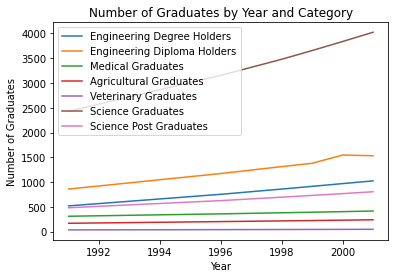

In [23]:
years = [1991, 1996, 1998, 1999, 2000, 2001]


plt.plot(years, df1['Engineering Degree Holders'], label='Engineering Degree Holders')
plt.plot(years, df1['Engineering Diploma Holders'], label='Engineering Diploma Holders')
plt.plot(years, df1['Medical Graduates*'], label='Medical Graduates')
plt.plot(years, df1['Agricultural Graduates'], label='Agricultural Graduates')
plt.plot(years,df1['Veterinary Graduates'] , label='Veterinary Graduates')
plt.plot(years, df1['Science Graduates'], label='Science Graduates')
plt.plot(years, df1['Science Post Graduates'], label='Science Post Graduates')

# Customize the chart
plt.title('Number of Graduates by Year and Category')
plt.xlabel('Year')
plt.ylabel('Number of Graduates')
plt.legend()

# Show the chart
plt.show()

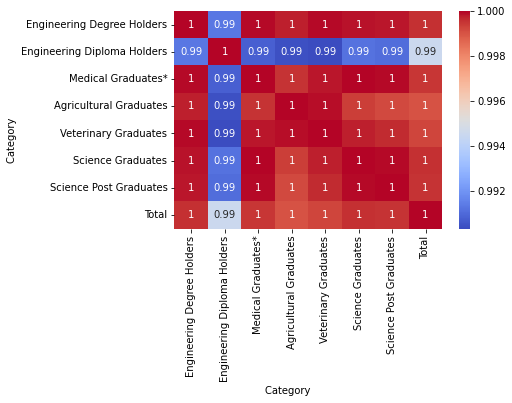

In [24]:
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

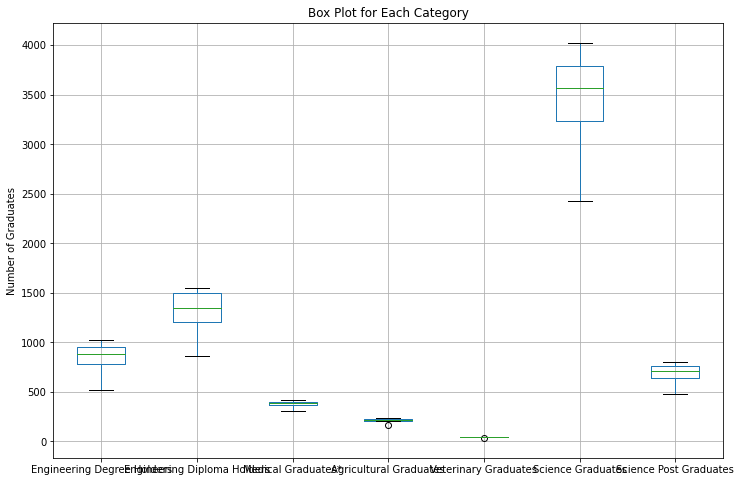

In [25]:
data = {
    'Engineering Degree Holders': [519.6, 753.3, 859.1, 913.7, 969.5, 1024.4],
    'Engineering Diploma Holders': [859.3, 1173.1, 1312.3, 1379.5, 1546.0, 1531.7],
    'Medical Graduates*': [310.3, 358.4, 380.4, 391.7, 403.4, 415.9],
    'Agricultural Graduates': [168.4, 202.3, 216.5, 223.8, 231.2, 238.6],
    'Veterinary Graduates': [34.4, 40.2, 42.7, 44.0, 45.3, 46.7],
    'Science Graduates': [2430.3, 3154.8, 3479.3, 3655.4, 3837.7, 4024.9],
    'Science Post Graduates': [482.0, 626.1, 695.5, 730.6, 767.1, 805.0]
}

# Convert the data to a DataFrame
df = pd.DataFrame.from_dict(data)

# Create a box plot for each category
df.boxplot(figsize=(12,8))
plt.title('Box Plot for Each Category')
plt.ylabel('Number of Graduates')
plt.show()

In [26]:
cols_to_scale = ['Engineering Degree Holders', 'Engineering Diploma Holders', 'Medical Graduates*', 
                 'Agricultural Graduates', 'Veterinary Graduates', 'Science Graduates', 'Science Post Graduates']

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the selected columns
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
df1[cols_to_scale]

Category,Engineering Degree Holders,Engineering Diploma Holders,Medical Graduates*,Agricultural Graduates,Veterinary Graduates,Science Graduates,Science Post Graduates
1991,-1.921559,-1.877681,-1.912068,-1.946029,-1.932268,-1.907986,-1.900977
1996,-0.519681,-0.541640,-0.526623,-0.482189,-0.498517,-0.525788,-0.547453
1998,0.114974,0.051020,0.107053,0.130983,0.119479,0.093291,0.104418
1999,0.442499,0.337133,0.432532,0.446205,0.440837,0.429254,0.434111
2000,0.777222,1.046026,0.769532,0.765745,0.762195,0.777045,0.776954
2001,1.106546,0.985142,1.129575,1.085285,1.108273,1.134184,1.132947


In [27]:
# Best feature selection

# compute the correlation matrix
corr_matrix = df1.corr().abs()

# select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find the features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# drop the highly correlated features from the dataset
df_filtered = df1.drop(to_drop, axis=1)

# print the remaining features
print(df_filtered.columns)

Index(['Engineering Degree Holders'], dtype='object', name='Category             ')


In [28]:
# Split the data into training and testing sets
X_train = df1[cols_to_scale].iloc[:4, 0].index.values.reshape(-1, 1)
X_test = df1[cols_to_scale].iloc[:-1, 0].index.values.reshape(-1, 1)
y_train = df1[cols_to_scale].iloc[:4,-1].values.ravel()
y_test = df1[cols_to_scale].iloc[:-1, -1].values.ravel()

# Fit a linear regression model to the training data
model = LinearRegression().fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Print the predicted values for the testing data
print('Predicted values for the testing data:')
print(y_pred)

# Evaluate the performance of the model using mean squared error and R-squared
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))

Predicted values for the testing data:
[-1.92695618 -0.47747514  0.10231728  0.39221349  0.6821097 ]
Mean squared error: 0.00
Mean absolute error: 0.05


In [29]:
n = float(input("Enter the degree holders:"))
n = np.array(n).reshape(-1,1)
print(model.predict(n)[0])

Enter the degree holders:519.6
-428.48023732384655
